In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GDF = pd.read_csv('Gauged_Daily_Flow_Data_Tyne_at_Bywell.csv')

In [3]:
GDF.head()

,Date,Daily Ave Flow(m3/s)
0,1956-10-01,54.1
1,1956-10-02,33.7
2,1956-10-03,44.2
3,1956-10-04,52.1
4,1956-10-05,42.8


In [4]:
GDF.shape

(22645, 2)

In [5]:
GDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22645 entries, 0 to 22644
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  22645 non-null  object 
 1   Daily Ave Flow(m3/s)  22449 non-null  float64
dtypes: float64(1), object(1)
memory usage: 265.4+ KB


In [6]:
GDF.describe()

,Daily Ave Flow(m3/s)
count,22449.000000
mean,45.167710
std,59.488278
min,2.480000
25%,12.940000
50%,25.700000
75%,52.500000
max,1450.000000


Splitting date into year, month and day fields

In [7]:
#Splitting date into year, month and day fields
GDF['year'] = GDF.Date.str.slice(0,4)
GDF['month'] = GDF.Date.str.slice(5,7)
GDF['day'] = GDF.Date.str.slice(8,10)

In [38]:
year_flow_ave = GDF[['month', 'Daily Ave Flow(m3/s)']].groupby(['month'], as_index=False).median().sort_values(by='month')
year_flow_ave.head(12)

,month,Daily Ave Flow(m3/s)
0,01,53.07
1,02,39.10
2,03,36.00
3,04,24.40
4,05,14.39
5,06,11.30
6,07,11.00
7,08,15.10
8,09,17.59
9,10,27.47


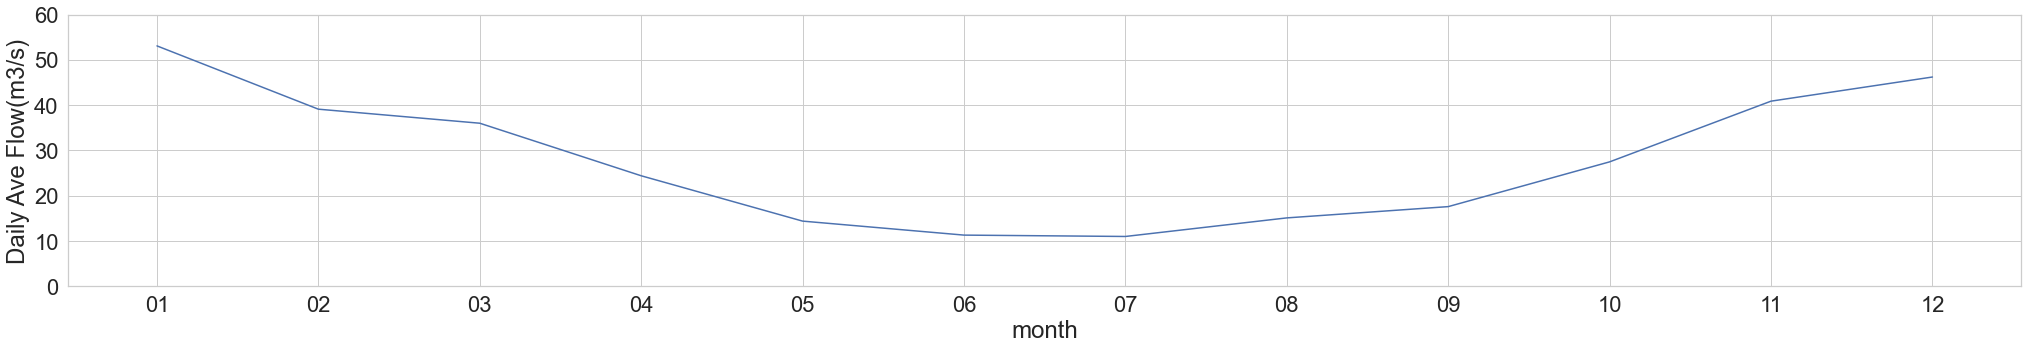

In [41]:
plt.figure(figsize=(35,5))
MonthFlowMedianPlot = sns.lineplot(x="month", y="Daily Ave Flow(m3/s)", data=year_flow_ave).set(ylim=(0, 60));

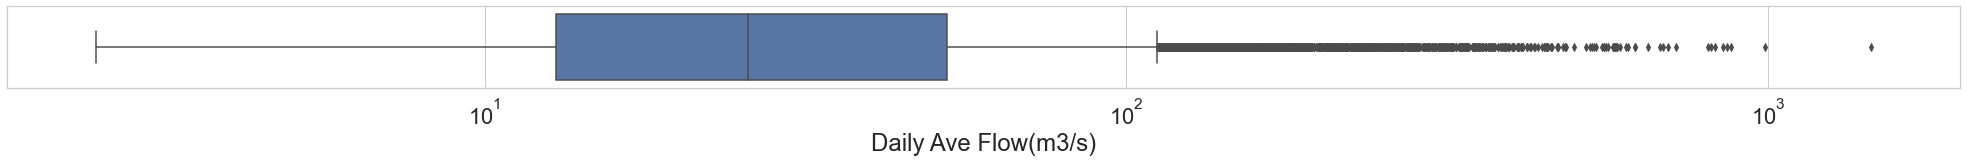

In [9]:
plt.figure(figsize=(35,1.5))
sns.set(style="whitegrid", font_scale=2)
  
boxplot_GDF = sns.boxplot(x=GDF["Daily Ave Flow(m3/s)"])
boxplot_GDF.set_xscale("log")

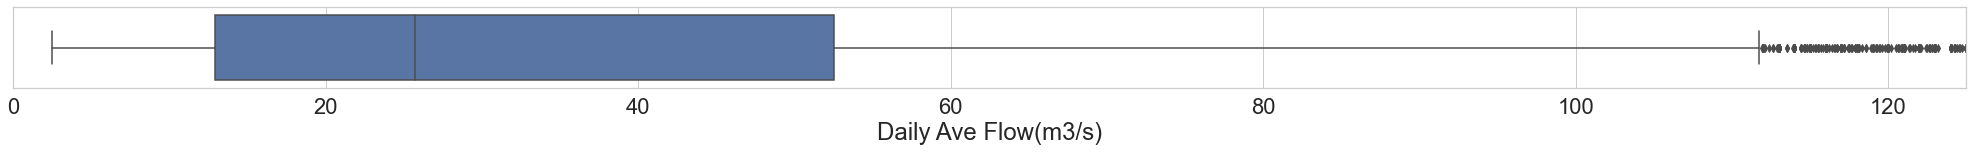

In [10]:
plt.figure(figsize=(35,1.5))
#Reducing the y limits to get better look at main data
plt.xlim(0, 125)
boxplot_GDF = sns.boxplot(x=GDF["Daily Ave Flow(m3/s)"])

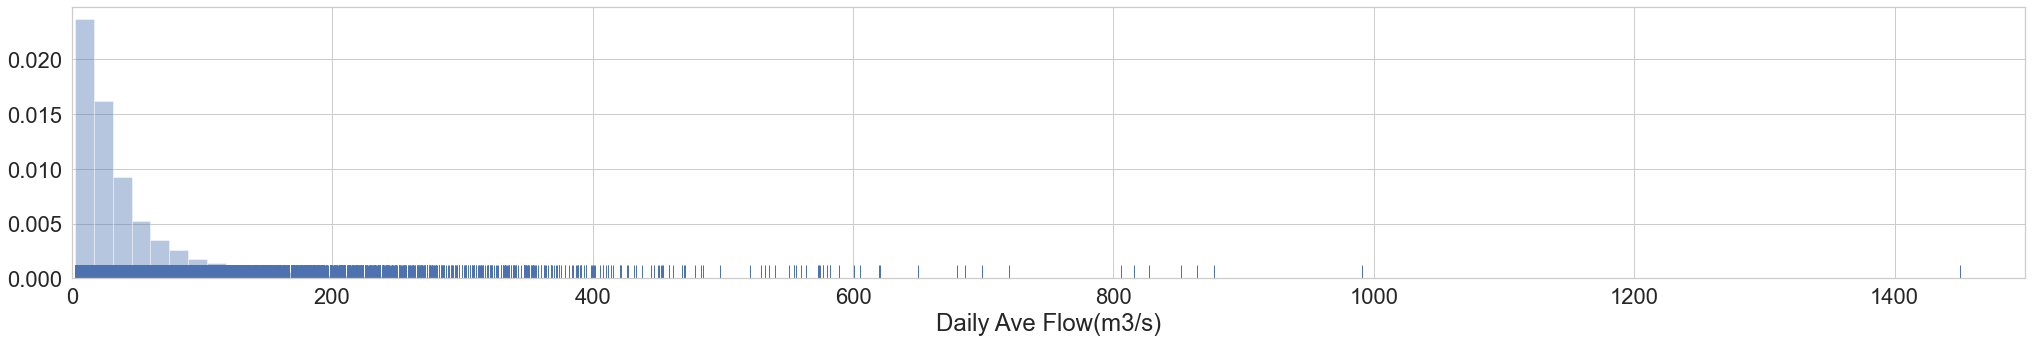

In [11]:
plt.figure(figsize=(35,5))
sns.distplot(GDF["Daily Ave Flow(m3/s)"], bins=100, kde=False, rug=True, norm_hist=True).set(xlim=(0, 1500));

In [12]:
below_equal_200 = GDF[GDF["Daily Ave Flow(m3/s)"] <= 200].count()
print(below_equal_200)

Date                    21848
Daily Ave Flow(m3/s)    21848
year                    21848
month                   21848
day                     21848
dtype: int64


In [13]:
above_200 = GDF[GDF["Daily Ave Flow(m3/s)"] > 200].count()
print(above_200)

Date                    601
Daily Ave Flow(m3/s)    601
year                    601
month                   601
day                     601
dtype: int64
